# Building Boosting algorithms in Python, step by step, using Titanic Data

### Project of Adaboost CatBoost XG Boost Titanic Survival ML

# PROBLEM STATEMENT

The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank, during her maiden voyage, after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following: 

- Pclass:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex:    Sex	
- Age:    Age in years	
- Sibsp:	# of siblings / spouses aboard the Titanic	
- Parch:	# of parents / children aboard the Titanic	
- Ticket:	Ticket number	
- Fare:	Passenger fare	
- Cabin:	Cabin number	
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


- Target class: Survived: Survival	(0 = No, 1 = Yes)


## IMPORT LIBRARIES
We are importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## IMPORT DATASET

In [2]:
# read the data using pandas dataframe
train = pd.read_csv('titanic_train.csv')

## EDA part

In [3]:
# Show the data head!
train.head()

#Dependent varaible is survived and rest of the features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The data has been properly imported. 
#### Observation :  We can't predict anything with the PasserngerId, Name, and Ticket column, hence we will drop it. Here, we understand Survived is our dependent variable. The place where the person has boarded the ship (Embarked column) shouldn't be predicting their chance of survival, hence it will also be dropped.

In [4]:
#Dependent varaible is survived and rest of the features
train.drop(["PassengerId","Name","Ticket","Embarked"],axis=1,inplace=True)
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85


# EXPLORE/VISUALIZE DATASET

In [5]:
# EXPLORE/VISUALIZE DATASET# Let's count the number of survivors and non-survivors
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Observation :  Here 1 means survived and 0 means died. Pretty much balanced data, since number of 1 and 0 are close.

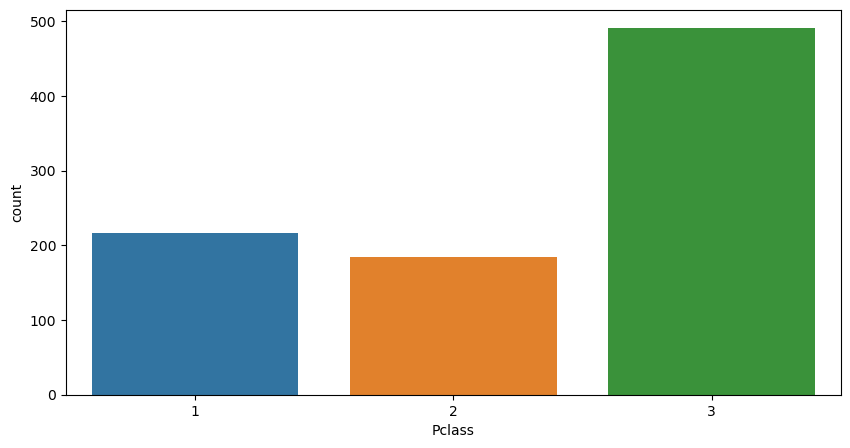

In [6]:
#Number of people travelling by different class
plt.figure(figsize=[10,5])
sns.countplot(x = 'Pclass', data = train)
plt.show()
#count plot is for each sub-category, that's why we are using this count plot

#### Observation :  Maximum people were travelling by 3rd class

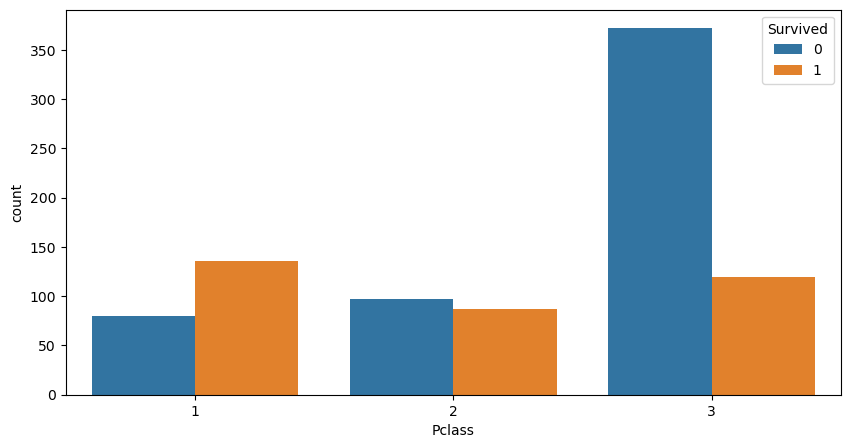

In [7]:
plt.figure(figsize=[10,5])
#Observation :  Here 1 means survived and 0 means died. 
#Pretty much balanced data, since number of 1 and 0 are close.
sns.countplot(x = 'Pclass', hue = 'Survived', data=train)
plt.show()

#### Observation :  More people travelling by 1st class survived; it's almost equal for 2nd class (marginally more people die though), and most of the people travelling by 3rd class died. This chart shows that the class had some impact whether a person would survive or not.

## Now the same analysis will be made on other independent variables

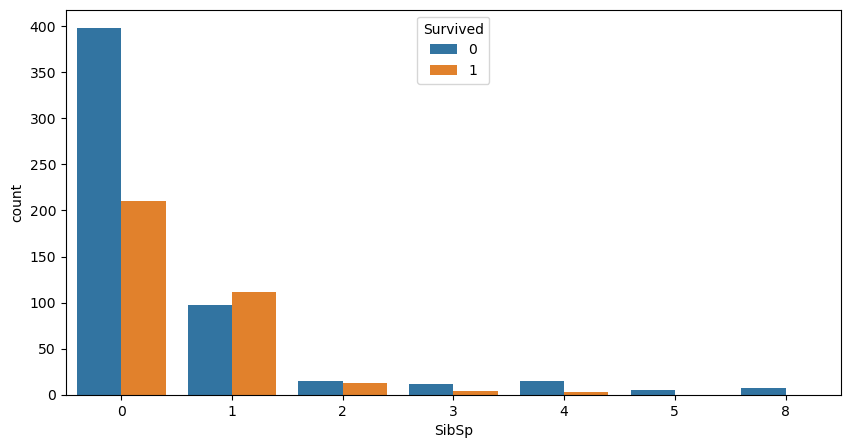

In [8]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'SibSp', hue = 'Survived', data=train)
plt.show()
#so we are doing comparison independent with dependent variable that is called bi-variate analysis

#### Observation :  Bar Chart to indicate the number of people survived based on their siblings status. If you have 1 siblings (SibSp = 1), you have a higher chance of survival compared to being alone (SibSp = 0)

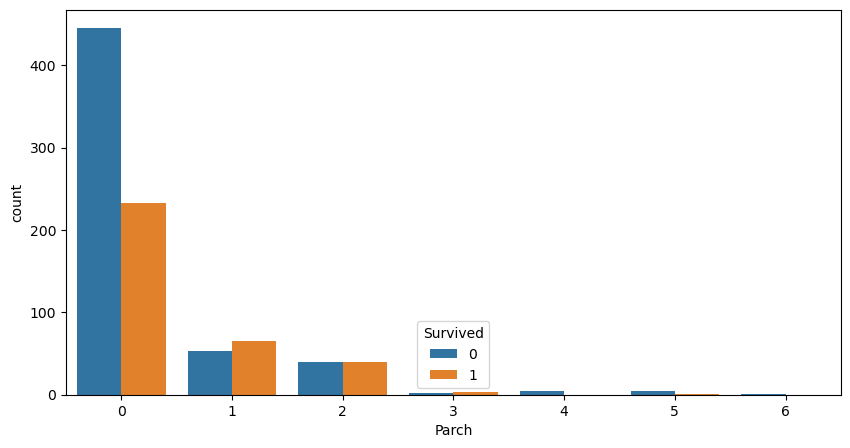

In [9]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'Parch', hue = 'Survived', data=train)
plt.show()

#### Observation :  Bar Chart to indicate the number of people survived based on their Parch status (how many parents onboard). If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival compared to being alone (Parch = 0)

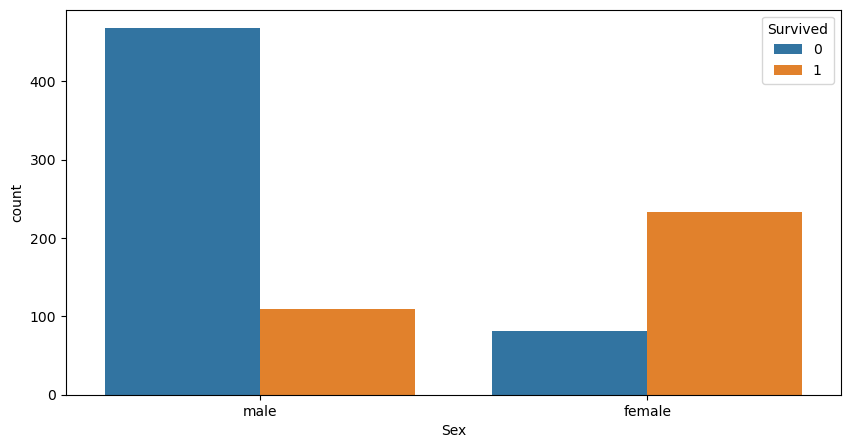

In [10]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'Sex', hue = 'Survived', data=train)
plt.show()

#### Observation :   Bar Chart to indicate the number of people survived based on their sex. If you are a female, you have a higher chance of survival compared to other ports!

#### Female and children were given first preference for safety, hence it makes sense that gender will help to predict the chances of survival.

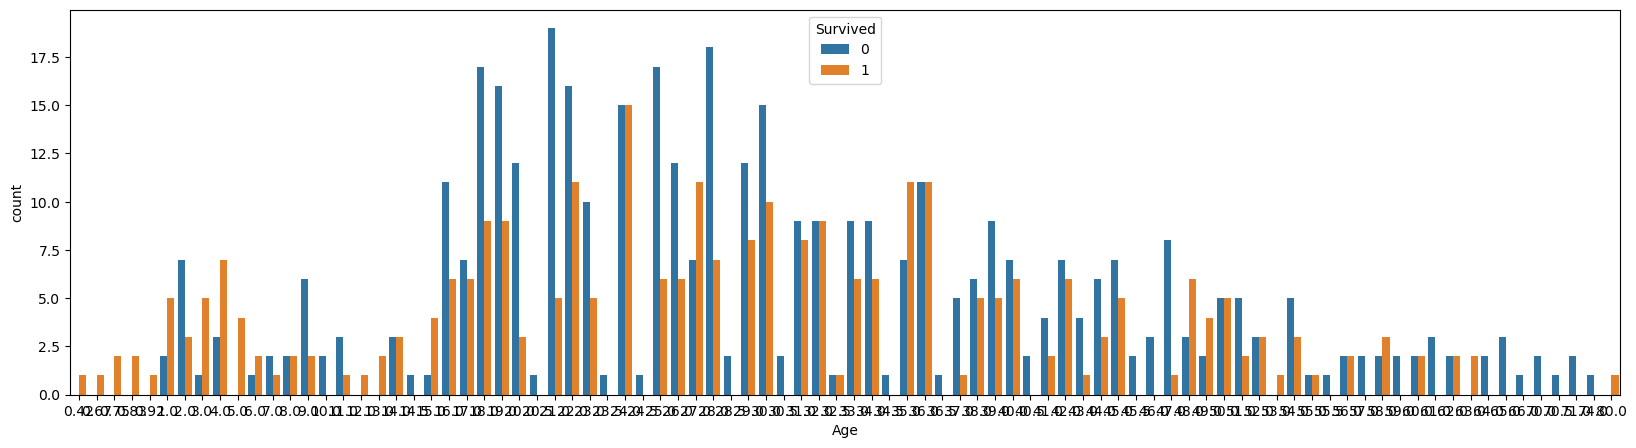

In [11]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'Age', hue = 'Survived', data=train)
plt.show()

#in this Age column countplot is not sufficient so we need to put histogram over this
#so that we will see clear picture or analysis for this.
#Histogram is always plotted with bins, but in this case we are doing countplot which 
#is very bad idea, because of overlapping.

#### Observation :   Bar Chart to indicate the number of people survived based on their age. If you are a baby, you have a higher chance of survival

#### Female and children were given first preference for safety, hence it makes sense that age will help to predict the chances of survival.

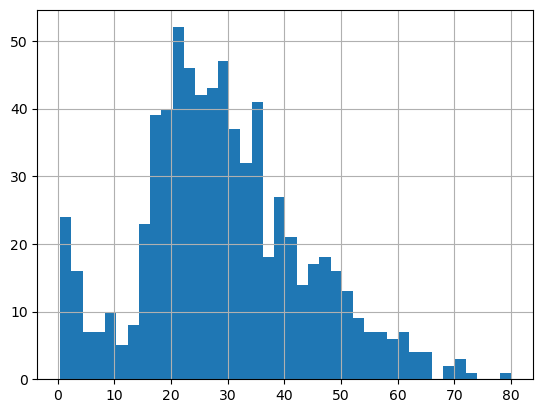

In [12]:
# Age Histogram 
train['Age'].hist(bins = 40) 
#in bins give any random number(as I give hypothetical 40 number of bins)
plt.show()
#In histogram age column will give you intervals like age 5 to 10 to 15 to 20 to 30 to 40 like this.
#Histogram is always plotted with bins

#so when we use continous value or numerical value then we have to use histogram not a count plot
#count plot and bar plot is for categorical not for continous or numerical

#as we already checked x axis for age that people survived
#now what is showing in y axis= (frequnecy)

#### Observation :   The histogram shows that majorly people were around the age of 20 to 30

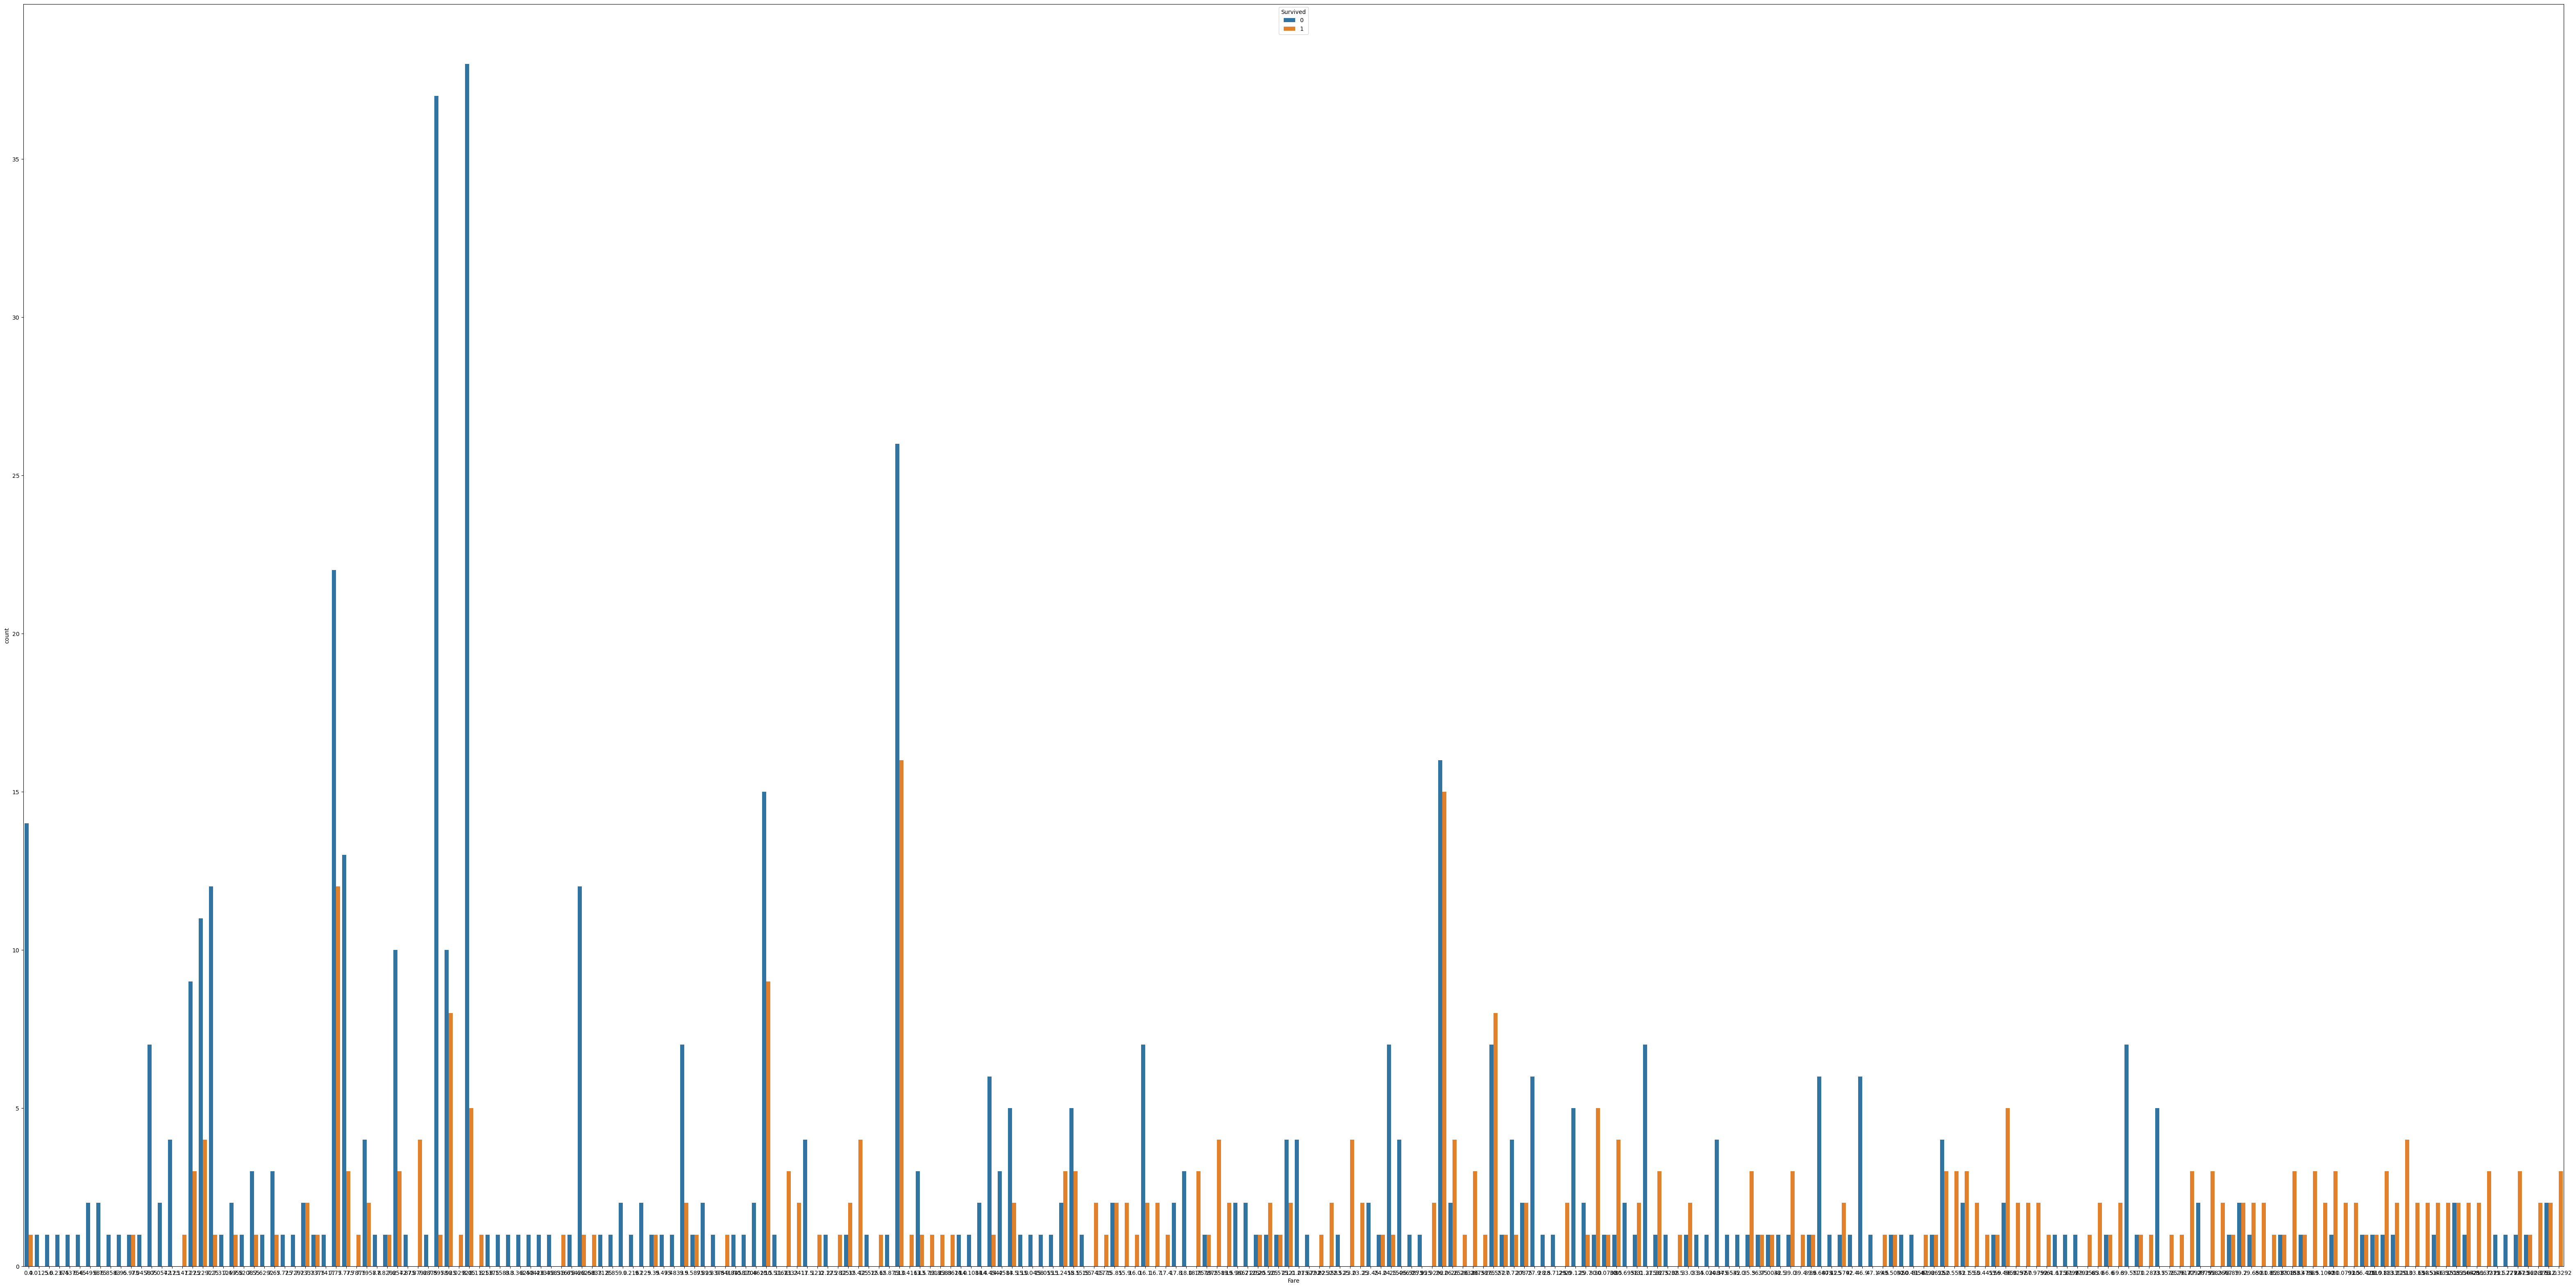

In [13]:
plt.figure(figsize=(80,40))
sns.countplot(x = 'Fare', hue = 'Survived', data=train)
plt.show()

#### Observation :   # Bar Chart to indicate the number of people survived based on their fare. If you pay a higher fare, you have a higher chance of survival

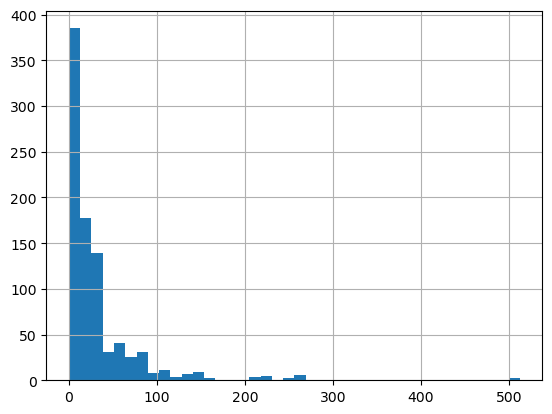

In [14]:
# Fare Histogram 
train['Fare'].hist(bins = 40)
plt.show()

#### Observation :   # Mostly people had paid low value fare. Only a handful of people had paid high fare. 

#### and done with data explonation part (EDA)

# PREPARE THE DATA FOR TRAINING/ DATA CLEANING 

In [15]:
# number of missing values by variables
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
dtype: int64

#### Observation: There are missing values for Age and Cabin

In [16]:
# percentage of missing values by variables
train.isnull().mean()*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
dtype: float64

#### Observation: Missing values are shown in percentage. 77% of total values in Cabin is missing, and 19.8% values of Age is missing.

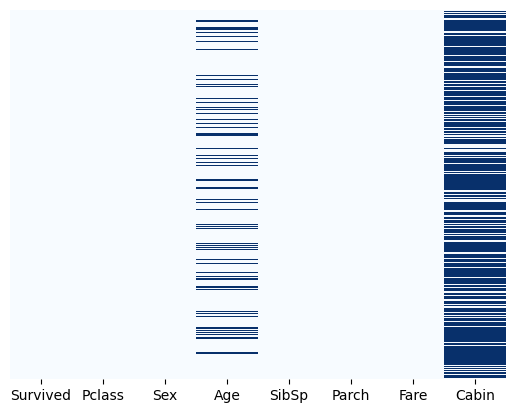

In [17]:
# Let's visualize which variables in the dataset are missing, only with x axis
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

#### Observation: Since a very high percentage of values in Cabin are missing, this variable is not going to help us in the model. We will drop it from the dataset

In [18]:
# Dropping the Cabin column
train.drop('Cabin',axis=1,inplace=True)

In [19]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


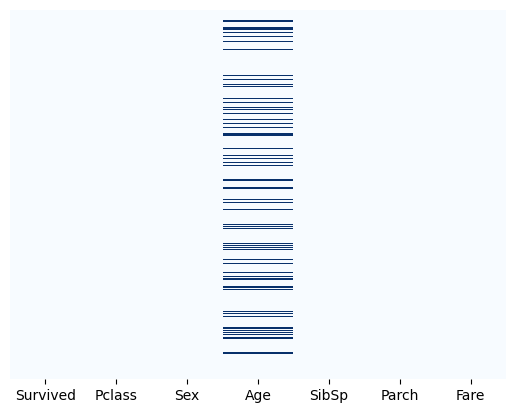

In [20]:
# Let's view the missing values in the data one more time! only with x axis
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

#### Observation: There are 19.8% of missing values in Age, we can't entirely drop the column, nor we can keep the missing values. We will replace them with the average. However, we can't replace all the missing values with the average of Age. It would be misleading. 

#### The mean of total Age could would be:

In [21]:
#Mean of total Age
train.Age.mean()

29.69911764705882

#### Observation: If we check the average age for different sex (male and female), we can see they are different values.

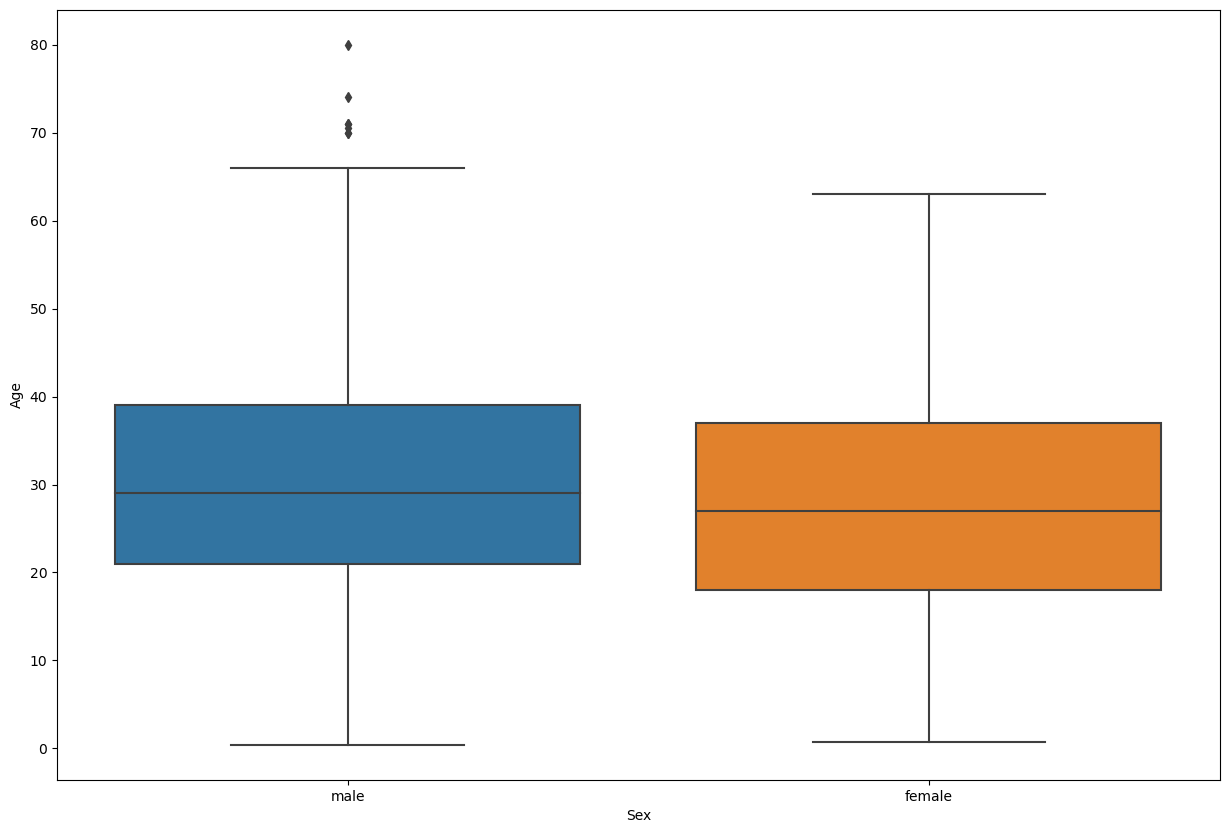

In [22]:
# Let's get the average age for male (~29) and female (~25)
plt.figure(figsize=(15, 10))
sns.boxplot(x='Sex', y='Age',data=train)
plt.show()

#### Hence, we should be replacing the missing Age values for female with average age of female and  replace the missing Age values for male with average age of male.

In [23]:
#Shows the missing values of Age for male
train.loc[(train["Age"].isnull()) & (train["Sex"] == "male"),"Age"].head()

5    NaN
17   NaN
26   NaN
29   NaN
36   NaN
Name: Age, dtype: float64

In [24]:
#Shows the average age for male
train.loc[train["Sex"] == "male","Age"].mean()

30.72664459161148

In [25]:
#Shows the missing values of Age for female
train.loc[(train["Age"].isnull()) & (train["Sex"] == "female"),"Age"].head()

19   NaN
28   NaN
31   NaN
32   NaN
47   NaN
Name: Age, dtype: float64

In [26]:
#Shows the average age for female
train.loc[train["Sex"] == "female","Age"].mean()

27.915708812260537

In [28]:
#Replace missing age for male and female with average age of male and female respectively
train.loc[(train["Age"].isnull()) & (train["Sex"] == "male"),"Age"] = train.loc[train["Sex"] == "male","Age"].mean()
#or we can use this as well
#train.loc[(train["Age"].isnull()) & (train["Sex"] == "male"),"Age"] = 30.72

train.loc[(train["Age"].isnull()) & (train["Sex"] == "female"),"Age"] = train.loc[train["Sex"] == "female","Age"].mean()

#or we can use this as well
#train.loc[(train["Age"].isnull()) & (train["Sex"] == "female"),"Age"] = 27.91

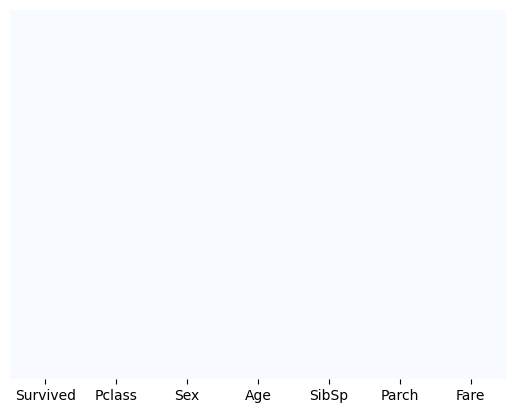

In [29]:
#Check again for missing values 
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()
# now there are no missing values

#### Now there are no missing values in the dataset. We have completed the data cleaning.

## Create Dummy variables
### We need to create the dummy variables for all the categorical variables.

In [30]:
#and 1 will your base dummy, in your two category male and female so female is your base dummy
#sex- male is 0 and sex- female is 1
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


#### Observation :  We can see that here we have only one categorical variable, i.e. Sex. We will create the dummy variable as shown below:

In [31]:
train = pd.get_dummies(data=train, columns=['Sex'],drop_first=True)
#and dummy creation is similer to encoding
#because machine only understand numerical values

In [32]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


##  Data split
### We will now split the data into dependent (y) and independent variable (X)

In [34]:
#Let's drop the target coloumn before we do train test split
X = train.drop('Survived',axis=1)
y = train['Survived']

#### Now we will split the data into training (80% of the data) and rest 20% - named test, will be kept aside for later use. 

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

##  Adaptive Boosting
 Adaptive Boosting, or most commonly known AdaBoost. It is sequentially growing decision trees as weak learners and punishing the incorrectly predicted samples by assigning a larger weight to them after each round of prediction. This way, the algorithm is learning from previous mistakes. The final prediction is the weighted majority vote (or weighted median in case of regression problems). After training a classifier at any level, ada-boost assigns weight to each training item. Misclassified item is assigned higher weight so that it appears in the training subset of next classifier with higher probability. After each classifier is trained, a weight is assigned to the classifier as well based on accuracy. More accurate classifier is assigned higher weight so that it will have more impact in final outcome.

In [36]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
classifier_ada = AdaBoostClassifier(random_state = 0)
classifier_ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

#  MODEL TESTING
## Once the model is executed, we will predict the test data with our model.

In [37]:
y_predict_test = classifier_ada.predict(X_test)

## Now we will check the confusion matrix and accuracy of the model

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       117
           1       0.73      0.76      0.75        62

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



#### Overall accuracy is 82% and precision for 0 and 1 are 87% and 73% respectively. 

##  Cat Boosting
CatBoost is an algorithm for gradient boosting on decision trees. It is used for search, recommendation systems, personal assistants, self-driving cars, weather prediction, and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is open-source and can be used by anyone.
Catboost is a boosted decision tree machine learning algorithm. It works in the same way as other gradient boosted algorithms such as XGBoost but provides support out of the box for categorical variables, has a higher level of accuracy without tuning parameters and also offers GPU support to speed up training.

In [42]:
#!pip3 install catboost

In [43]:
from catboost import CatBoostClassifier
#clf=catbclsf(hyper-parameter is iteration)
#catboost algo is iteration process it keeps on executive till it finds the best
#eval_metric is for accuracy and verbose is for output 
#that means give me verbose every 500 iteration
clf = CatBoostClassifier(iterations=10000, eval_metric = 'Accuracy', verbose = 500)
clf.fit(X_train, y_train, eval_set = (X_test, y_test))

Learning rate set to 0.010702
0:	learn: 0.8132022	test: 0.8659218	best: 0.8659218 (0)	total: 154ms	remaining: 25m 37s
500:	learn: 0.8679775	test: 0.8379888	best: 0.8659218 (0)	total: 1.24s	remaining: 23.5s
1000:	learn: 0.8960674	test: 0.8379888	best: 0.8659218 (0)	total: 2.42s	remaining: 21.7s
1500:	learn: 0.9255618	test: 0.8324022	best: 0.8659218 (0)	total: 3.6s	remaining: 20.4s
2000:	learn: 0.9410112	test: 0.8268156	best: 0.8659218 (0)	total: 4.83s	remaining: 19.3s
2500:	learn: 0.9508427	test: 0.8379888	best: 0.8659218 (0)	total: 6.07s	remaining: 18.2s
3000:	learn: 0.9592697	test: 0.8324022	best: 0.8659218 (0)	total: 7.5s	remaining: 17.5s
3500:	learn: 0.9676966	test: 0.8268156	best: 0.8659218 (0)	total: 8.93s	remaining: 16.6s
4000:	learn: 0.9747191	test: 0.8212291	best: 0.8659218 (0)	total: 10.3s	remaining: 15.4s
4500:	learn: 0.9789326	test: 0.8268156	best: 0.8659218 (0)	total: 11.6s	remaining: 14.2s
5000:	learn: 0.9803371	test: 0.8268156	best: 0.8659218 (0)	total: 13.1s	remaining: 1

In [44]:
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       117
           1       0.85      0.74      0.79        62

    accuracy                           0.87       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179



#### Overall accuracy is 87% and precision for 0 and 1 are 87% and 85% respectively. 
#### CatBoost has given us a significantly better result than AdaBoost

##  XGBoost


In [45]:
import xgboost as xgb
from xgboost import XGBClassifier

In [46]:
classifier =XGBClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       117
           1       0.79      0.77      0.78        62

    accuracy                           0.85       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



#### Overall accuracy is 85% and precision for 0 and 1 are 79% and 77% respectively. 
#### CatBoost seems to have given us the best result

### Recall of 1 - it shows what % of total 1 available in the data could be identified by the model.
### Precision of 1 - it shows what % of total 1 predicted by the model actually has been correctly identified.

In [48]:
#majority of case XG boost gives highest rating but in this case catBoost gives highest rating.